# Data Sources

Below are examples of how to grab cross sections from the EAF 
and simple data sources and re-discretize them.

In [15]:
from pyne.xs.data_source import *
from pyne.bins import stair_step
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', family='serif', size=14)
import numpy as np
dst_e_g = np.logspace(1, -7, 11)

## EAF Data Source

In [16]:
eds = EAFDataSource()
rx = eds.reaction('U235', 'gamma')
rx

array([3.40601e-04, 4.13527e-04, 4.52339e-04, 5.35260e-04, 7.79656e-04,
       9.12824e-04, 1.05027e-03, 1.20057e-03, 1.33202e-03, 1.46200e-03,
       1.60595e-03, 1.67206e-03, 1.76457e-03, 1.90211e-03, 2.03703e-03,
       2.12614e-03, 2.15500e-03, 2.15923e-03, 2.17015e-03, 2.19708e-03,
       2.24992e-03, 2.34009e-03, 2.47761e-03, 2.65621e-03, 2.80624e-03,
       2.93429e-03, 3.18937e-03, 3.54963e-03, 3.99022e-03, 4.53866e-03,
       5.21324e-03, 6.05776e-03, 7.06523e-03, 9.26177e-03, 1.27481e-02,
       1.75162e-02, 2.23344e-02, 2.54474e-02, 2.88533e-02, 3.21686e-02,
       3.59024e-02, 4.03127e-02, 4.31805e-02, 4.57085e-02, 4.57084e-02,
       4.57112e-02, 4.87787e-02, 5.18315e-02, 5.62859e-02, 6.08943e-02,
       6.55405e-02, 7.01358e-02, 7.41851e-02, 7.78783e-02, 8.13216e-02,
       8.57563e-02, 8.88694e-02, 9.13386e-02, 9.53971e-02, 9.82263e-02,
       1.00158e-01, 1.04962e-01, 1.08964e-01, 1.11877e-01, 1.14201e-01,
       1.16384e-01, 1.19622e-01, 1.23457e-01, 1.27270e-01, 1.317

In [17]:
eds.dst_group_struct = dst_e_g
rxc = eds.discretize('U235', 'gamma')

Text(0,0.5,'Cross Section [barns]')

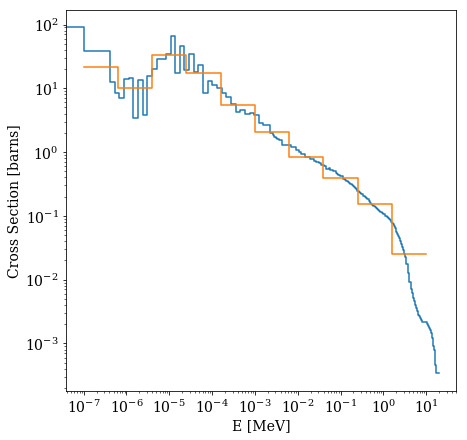

In [18]:
fig = plt.figure(figsize=(7,7))
plt.loglog(*stair_step(eds.src_group_struct, rx), figure=fig)
plt.loglog(*stair_step(eds.dst_group_struct, rxc), figure=fig)
plt.xlabel('E [MeV]')
plt.ylabel('Cross Section [barns]')

## Simple Data Source

In [7]:
sds = SimpleDataSource(dst_group_struct=dst_e_g)
print(sds.exists)
rx = sds.reaction('U233', 'absorption')
rxc = sds.discretize('U233', 'absorption')

True


Text(0,0.5,'Cross Section [barns]')

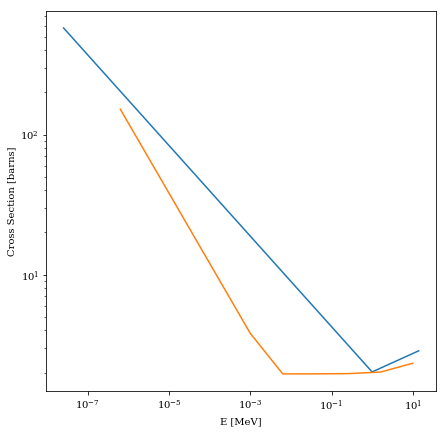

In [8]:
fig = plt.figure(figsize=(7,7))
plt.loglog(sds.src_group_struct[:-1], rx, figure=fig)
plt.loglog(sds.dst_group_struct[:-1], rxc, figure=fig)
plt.xlabel('E [MeV]')
plt.ylabel('Cross Section [barns]')

The data sources are caches, which means that subsequent requests for 
the same data are very fast! 

In [9]:
%time sds.reaction('U238', 'fiss')
print()
%time sds.reaction('U238', 'fission')
print()
%time sds.reaction('U238', 'fiss')
print()

CPU times: user 20 ms, sys: 0 ns, total: 20 ms
Wall time: 16.8 ms

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 33.1 µs

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 21.5 µs

